In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb; sb.set_style( 'darkgrid' )
from numpy.random import SeedSequence, default_rng

rng = default_rng( SeedSequence().entropy )

import warnings
warnings.filterwarnings("ignore")

#### First some warm up tasks. When in doubt, the help() function is your friend.

#### 1- Create Gaussian, Exponential and Cauchy random variable ( r.v ) vectors of length $n$. For each vector, plot $\frac{\sum_i^k x_i}{k}, k=1..n$. When does the sequence stabilizes and what can you observe?

#### ( Do not go $n \geq 1000000$ if you want to save time. )

#### Bonus 1: experiment with other distributions and their parameters. Below are the cumulative distributional functions of the r.vs used in this exercise.

#### Bonus 2: experiment by plotting a combination of r.vs. For example, Gaussian + Exponential.

+ Gaussian: $\mathcal{N}(\mu, \sigma)$ ($\mu$: mean, $\sigma$: standard deviation or scale)
+ Caucy: $F(x_0;\lambda): \frac{1}{\pi} \text{arctan}(\frac{x-x_0}{\lambda}) + \frac{1}{2}$
+ Exponential: $F(x;\lambda) = 1 - {\rm e}^{-\lambda x}$ ($\lambda$: rate parameter) 

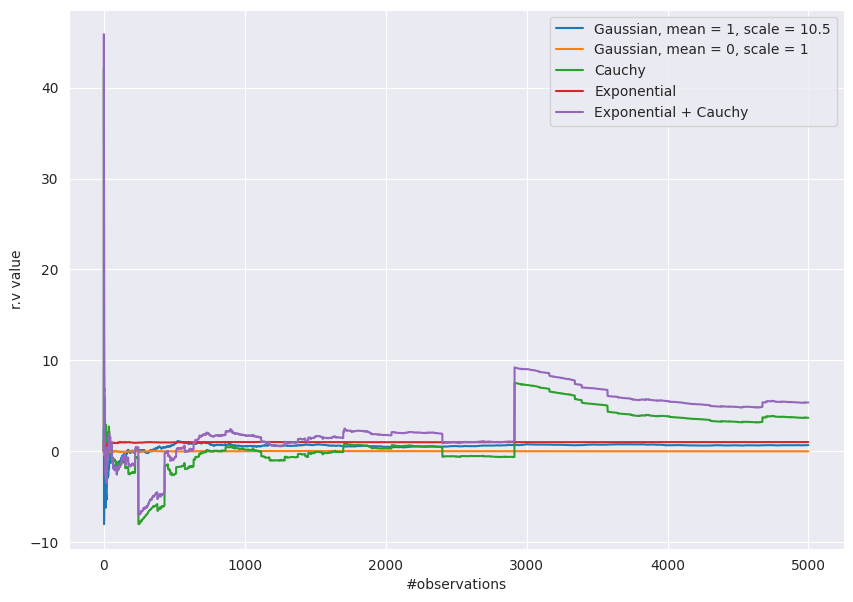

In [15]:
from scipy.stats import norm
from scipy.stats import cauchy
from scipy.stats import expon

n = 5000

Grv1 = norm.rvs( loc = 1, scale = 10.5, size = n, random_state = rng )
Grv2 = norm.rvs( size = n, random_state = rng )
Crv = cauchy.rvs( loc = -1, scale = 2.5, size = n, random_state = rng )
Erv = expon.rvs( size = n, random_state = rng )

a1 = []
for i in range(len(Grv1)): 
    if i == 0: a1.append( sum( Grv1[ :i ] )/ 1 )
    else: a1.append( sum( Grv1[ :i ] )/ i )

a2 = []
for i in range(len(Grv2)): 
    if i == 0: a2.append( sum( Grv2[ :i ] )/ 1 )
    else: a2.append( sum( Grv2[ :i ] )/ i )
        
b = []
for i in range(len(Crv)): 
    if i == 0: b.append( sum( Crv[ :i ] )/ 1 )
    else: b.append( sum( Crv[ :i ] )/ i )
        

c = []
for i in range(len(Erv)): 
    if i == 0: c.append( sum( Erv[ :i ] )/ 1 )
    else: c.append( sum( Erv[ :i ] )/ i )
        
d = []
for i in range(len(Erv)):
    X = Erv + Crv + Grv1
    if i == 0: d.append( sum( X[ :i ] )/ 1 )
    else: d.append( sum(  X[ :i ] )/ i )

plt.figure( figsize=( 10, 7 ) )
plt.plot( a1, label = "Gaussian, mean = 1, scale = 10.5" )
plt.plot( a2, label = "Gaussian, mean = 0, scale = 1" )
plt.plot( b, label = "Cauchy" )
plt.plot( c, label = "Exponential" )
plt.plot( d, label = "Exponential + Cauchy" )

plt.legend( loc = "best")
plt.xlabel( '#observations')
plt.ylabel( 'r.v value')
plt.show()

#### 2- Create a discrete uniformly distributed (values between 0 and 10) and Bernoulli ($p=0.5$) random variable ( r.v ) vectors of length $n=10^5$. First, plot each r.v separately in a histogram. Then sum up different amounts of r.vs of the same kind ( Bernoulli + Bernoulli + ...) , and plot their sums into a histogram. What can you observe?

Note: be sure to declare the r.vs into their own variables.
Example:
uniform_1 = stats.randint( 0, 10 );
uniform_2 = stats.randint( 0, 10 )

plt.hist( uniform_1 + uniform_2 )

In [65]:
Urv = stats.randint( 0, 10 ) # Discrete uniform distributed r.v between 0 and 10

a = Urv.rvs( size = 10**5 )
b = Urv.rvs( size = 10**5 )
c = Urv.rvs( size = 10**5 )

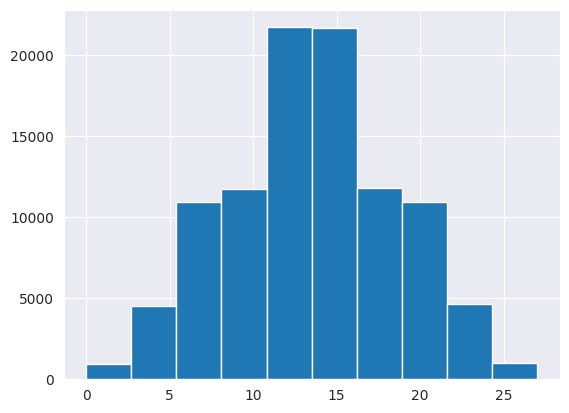

In [72]:
plt.hist( a+b+c );

In [77]:
Brv = stats.bernoulli( p = 0.5 )

b0 = Brv.rvs( size = 10**5 )
b2 = Brv.rvs( size = 10**5 )
b1 = Brv.rvs( size = 10**5 )
b3 = Brv.rvs( size = 10**5 )
b4 = Brv.rvs( size = 10**5 )

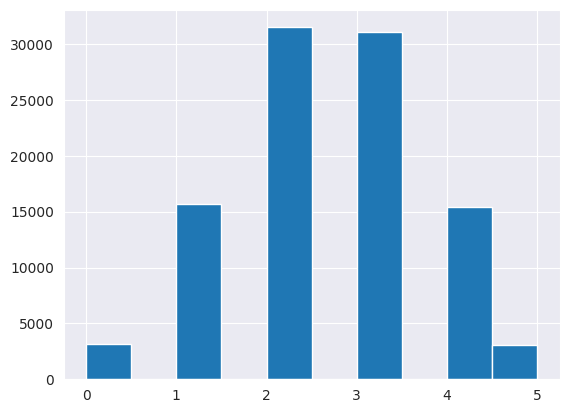

In [78]:
plt.hist( b0 + b1 + b2 + b3 + b4 );

#### 3- Create two vectors of Gaussian random variables ( r.vs ) and perform a linear regression, using scipy.stats.linregress. Perform the regression, for example, $k=1000$  times and plot the histogram of correlation coffecients and p-values.

#### Bonus 1: experiment the same linear regression with other r.vs.

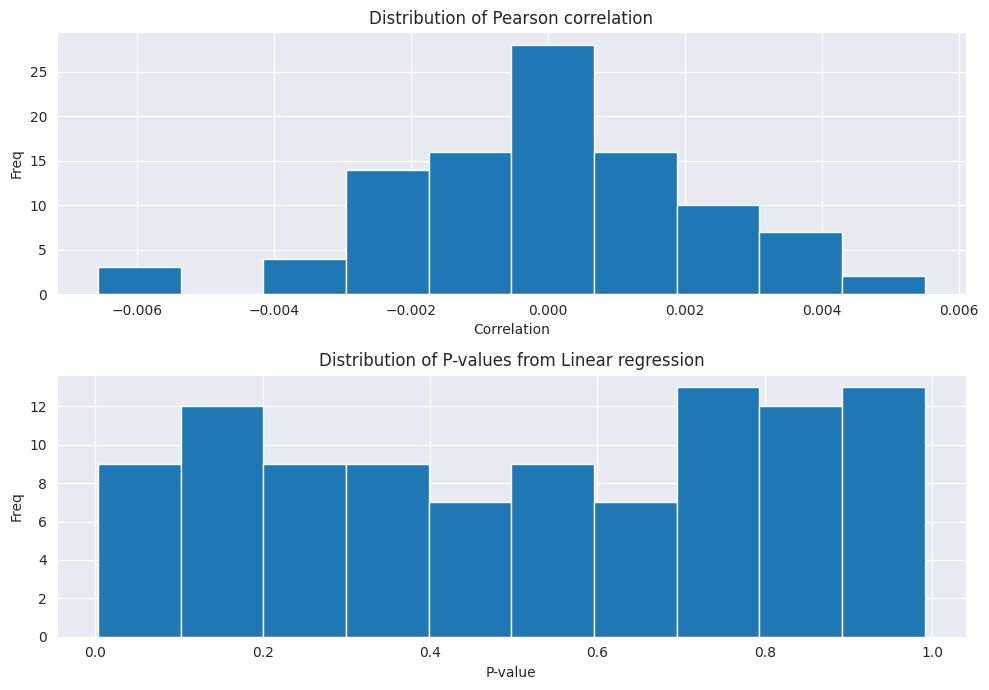

In [17]:
C = []
P = []
k = 100
n = 200000
for k in range( k ):

    X = norm.rvs( size = n, random_state = rng )
    Y = expon.rvs( size = n, random_state = rng )
   
    slope, intercept, r, p, se = stats.linregress(X, Y)
    C.append( r )
    P.append( p )

fig, axs = plt.subplots(2, 1, figsize = ( 10, 7 ))
axs[0].hist( C )
axs[0].set_xlabel('Correlation')
axs[0].set_ylabel('Freq')
axs[0].set_title( 'Distribution of Pearson correlation')
axs[0].grid(True)

axs[1].hist( P  )
axs[1].set_ylabel('Freq')
axs[1].set_xlabel('P-value')
axs[1].set_title( 'Distribution of P-values from Linear regression')
fig.tight_layout()
plt.show()


#### 3-  Run each model, on the Iris data set, $rounds=k$ times using different train/test partitions and take the avegarge of their error rates. Plot and compare the models below using 0-1 metric on the predicted data and labelled data. Experiment with different number of $k$ rounds.

+ Use default definitions of the models.
+ For plotting: use train set proportion on the x-axis and probability of error on the y-axis

#### Bonus 1: experiment with other model loss functions, penalites, and solvers. For example, loss = "squared_hinge" SGDClassifier. Use the help() function to see what options are available in a particular model.

training SGD
training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training SAG


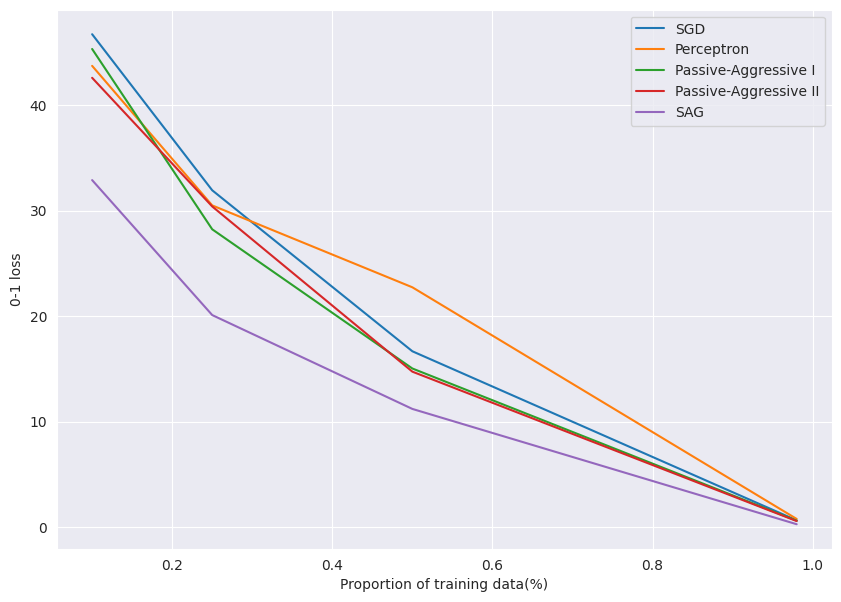

In [86]:
from sklearn import datasets as data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

iris = data.load_iris()
X    = iris.data
y    = iris.target

heldout = [ 0.90, 0.75, 0.50, 0.02 ] # suggested starting point. Modify to your liking.
rounds  = 30

models = [
    ("SGD", SGDClassifier(max_iter=110)),
    ("Perceptron", Perceptron(max_iter=110)),
    (
        "Passive-Aggressive I",
        PassiveAggressiveClassifier(max_iter=110, loss="hinge", C=1.0, tol=1e-4),
    ),
    (
        "Passive-Aggressive II",
        PassiveAggressiveClassifier( max_iter=110, loss="squared_hinge", C=1.0, tol=1e-4 ),
    ),
    (
        "SAG",
        LogisticRegression(max_iter=110, solver="sag", tol=1e-1, C=1.0e4 / X.shape[0]),
    ),
]

xx = 1.0 - np.array(heldout)

plt.figure( figsize=( 10, 7 ) )

for name, clf in models:
    print( f"training {name}")
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=i, random_state = rng.integers( 124 )
            )
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append( metrics.zero_one_loss( y_test, y_pred, normalize = False ) )
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)


plt.legend(loc="upper right")
plt.xlabel("Proportion of training data(%)" )
plt.ylabel("0-1 loss")
plt.show()

#### 4a- Repeat the experiments on task 4, but on a single train/test split, for each model separately and plot the model's error rates in a histogram.

##### Bonus: use other loss functions from sklearn.metrics for multiclass classification

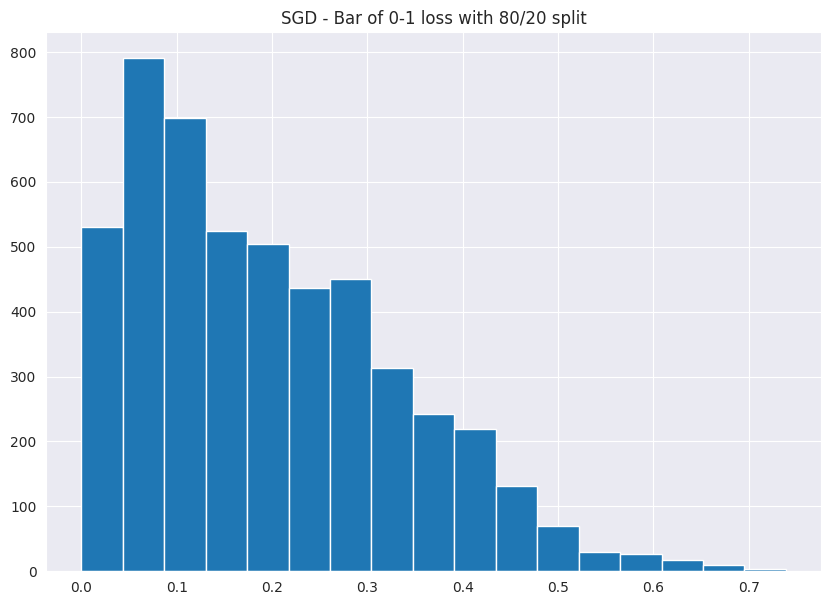

In [23]:
(name, clf) = models[ 0 ]

yy = []
    
yy_ = []
for r in range( 5000 ):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = rng.integers( 124 ) )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    yy_.append( metrics.zero_one_loss( y_test, y_pred ) )

plt.figure( figsize=( 10, 7 ) )
plt.hist( yy_, bins = np.unique( yy_ )  )
plt.title("SGD - Bar of 0-1 loss with 80/20 split")
plt.show()

#### 4b- Choose an accuracy from the previous exercise (4a), and compute a Binomial distribution of how would you expect the accuracy perform if that specific accuarcy would be expected. Insert $p$ as the accuracy obtained from the model into $\binom{n}{k}p^k(1-p)^{n-k}$

In [90]:
from scipy.stats import binom
n, p = 10**3, 0.1

mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

In [91]:
print( mean, var, skew, kurt )

100.0 90.0 0.08432740427115679 0.00511111111111111


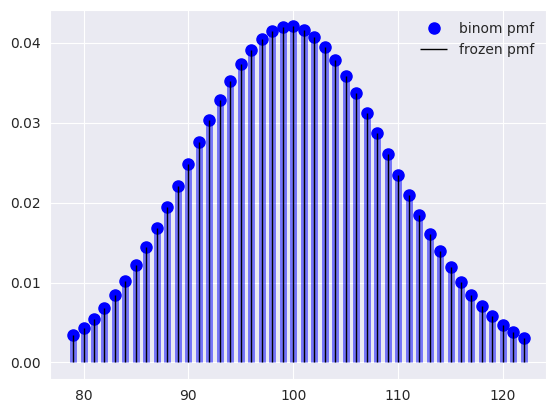

In [92]:
x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))

fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()